<a href="https://colab.research.google.com/github/Praneeth-18/DataMining6/blob/main/Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Gaussian Mixture Models (GMMs) are a probabilistic model for representing normally distributed subpopulations within an overall population. They are especially useful in scenarios where you want to identify subgroups within your data or when the data doesn't clearly form distinct clusters.

Here is a complete workflow, including the Python code, to work with GMMs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

In [3]:
# Synthetic data generation
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

In [4]:
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=0).fit(X)
labels = gmm.predict(X)

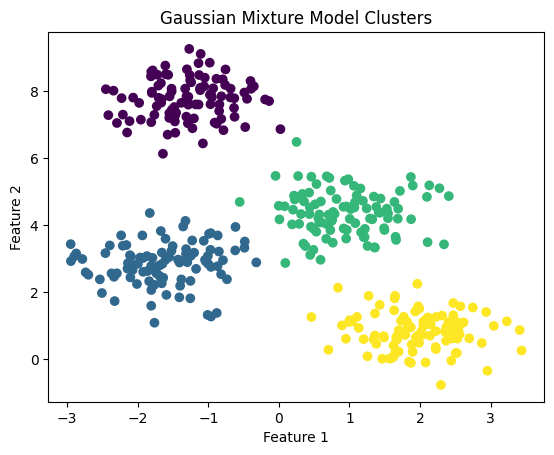

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Gaussian Mixture Model Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

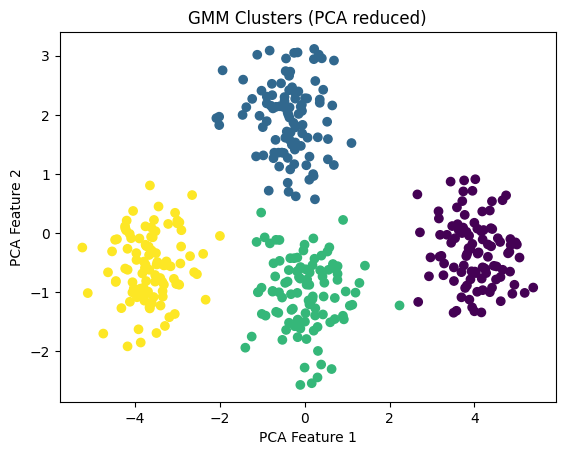

In [6]:
# Apply PCA if the data is high-dimensional
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("GMM Clusters (PCA reduced)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()

In [7]:
print("Weights:\n", gmm.weights_)
print("\nMeans:\n", gmm.means_)
print("\nCovariances:\n", gmm.covariances_)

Weights:
 [0.24878736 0.24702726 0.25454734 0.24963804]

Means:
 [[-1.27635633  7.76222624]
 [-1.62828783  2.84407337]
 [ 0.93141671  4.36221851]
 [ 1.9579654   0.83760086]]

Covariances:
 [[[ 0.28921965  0.01293533]
  [ 0.01293533  0.36530305]]

 [[ 0.37394003  0.02716798]
  [ 0.02716798  0.38465995]]

 [[ 0.36933794 -0.00235346]
  [-0.00235346  0.40398685]]

 [[ 0.34173529 -0.02444193]
  [-0.02444193  0.29768676]]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [9]:
# For synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

# For real-world datasets
# X = pd.read_csv('your_dataset.csv')

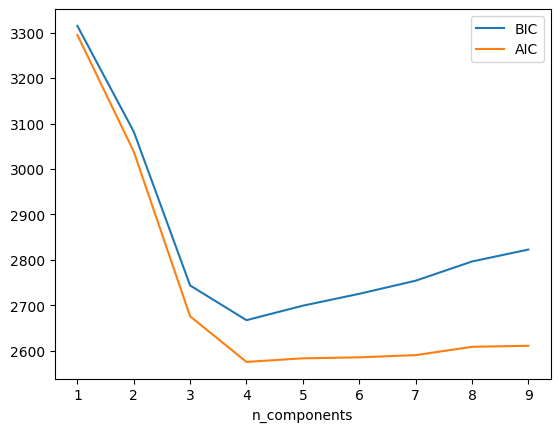

In [10]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

In [11]:
# Assuming optimal components based on BIC/AIC is 4
gmm = GaussianMixture(n_components=4, random_state=0).fit(X)
labels = gmm.predict(X)

In [12]:
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Silhouette Score: 0.6778186532400019
Calinski-Harabasz Score: 1619.7180727962934


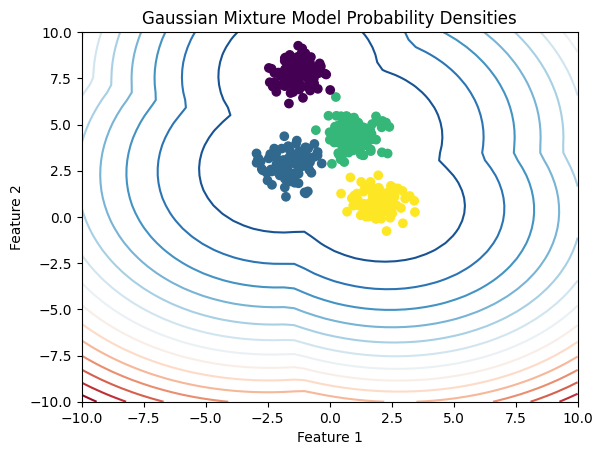

In [13]:
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
X_grid = np.array([x.ravel(), y.ravel()]).T
Z = -gmm.score_samples(X_grid)
Z = Z.reshape(x.shape)

plt.contour(x, y, Z, levels=14, cmap='RdBu_r')
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Gaussian Mixture Model Probability Densities")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [14]:
print("Weights:\n", gmm.weights_)
print("\nMeans:\n", gmm.means_)
print("\nCovariances:\n", gmm.covariances_)

Weights:
 [0.24878736 0.24702726 0.25454734 0.24963804]

Means:
 [[-1.27635633  7.76222624]
 [-1.62828783  2.84407337]
 [ 0.93141671  4.36221851]
 [ 1.9579654   0.83760086]]

Covariances:
 [[[ 0.28921965  0.01293533]
  [ 0.01293533  0.36530305]]

 [[ 0.37394003  0.02716798]
  [ 0.02716798  0.38465995]]

 [[ 0.36933794 -0.00235346]
  [-0.00235346  0.40398685]]

 [[ 0.34173529 -0.02444193]
  [-0.02444193  0.29768676]]]


## **Motivating Gaussian Mixtures: Weaknesses of k-Means**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons

# Generate non-spherical data
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=0)

In [17]:
# k-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)
labels_kmeans = kmeans.predict(X)

# GMM
gmm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels_gmm = gmm.predict(X)

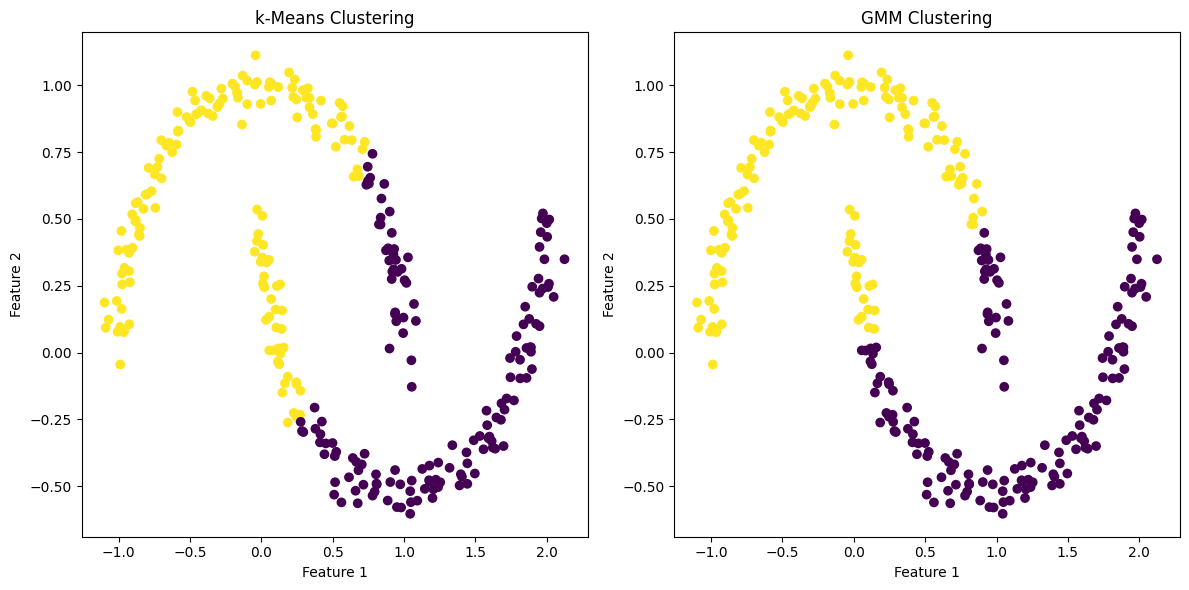

In [18]:
plt.figure(figsize=(12, 6))

# k-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.title("k-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# GMM Clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', marker='o')
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

GMMs offer a more flexible and probabilistic approach to clustering, making them suitable for a wider range of applications, especially where the data does not conform to the assumptions of k-Means. This flexibility, however, comes at the cost of increased computational complexity and the need to choose the number of Gaussian components carefully.

# **Generalizing E–M: Gaussian Mixture Models**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

In [20]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

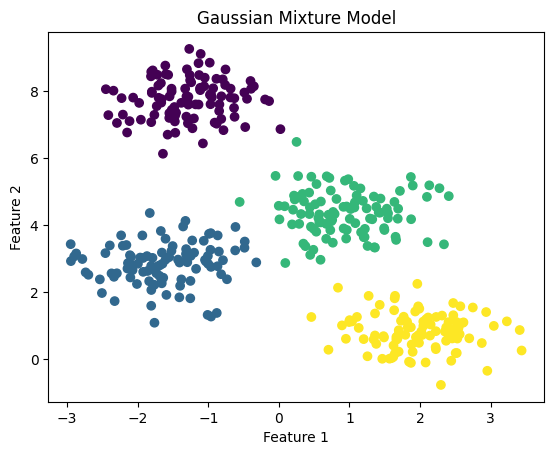

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Gaussian Mixture Model")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [22]:
print("Means:\n", gmm.means_)
print("Covariances:\n", gmm.covariances_)

Means:
 [[-1.27635633  7.76222624]
 [-1.62828783  2.84407337]
 [ 0.93141671  4.36221851]
 [ 1.9579654   0.83760086]]
Covariances:
 [[[ 0.28921965  0.01293533]
  [ 0.01293533  0.36530305]]

 [[ 0.37394003  0.02716798]
  [ 0.02716798  0.38465995]]

 [[ 0.36933794 -0.00235346]
  [-0.00235346  0.40398685]]

 [[ 0.34173529 -0.02444193]
  [-0.02444193  0.29768676]]]


GMMs via the E-M algorithm offer a flexible and powerful way to model data that comes from multiple populations or categories. This method is particularly useful in situations where the data does not conform to a single Gaussian distribution, and there is no clear separation between clusters, as often seen in real-world data.

## **Gaussian Mixture Models as Density Estimation**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy import stats

# Generating synthetic data with two peaks
X = np.concatenate([np.random.normal(-1, 0.5, 300), np.random.normal(3, 0.5, 700)]).reshape(-1, 1)

In [24]:
# Fitting GMM
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)

GaussianMixture(n_components=2, random_state=0)

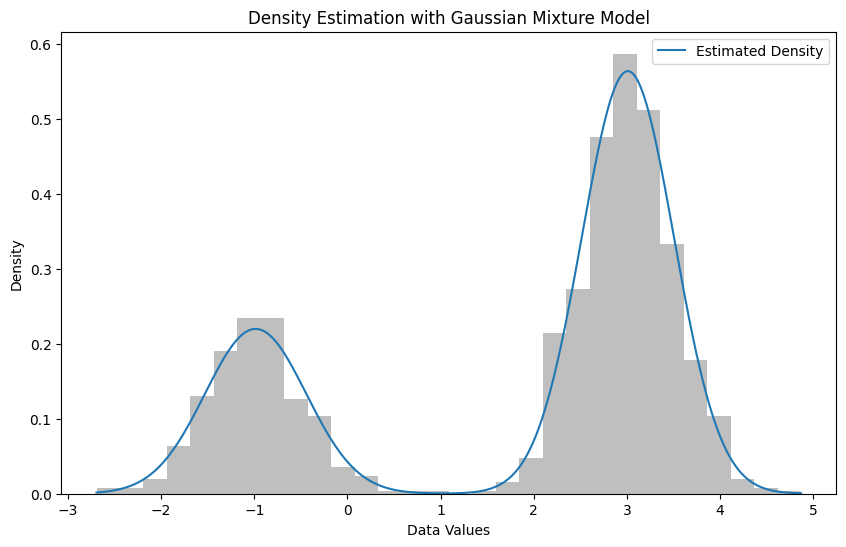

In [25]:
# Generating a range of values to estimate the density
x = np.linspace(np.min(X), np.max(X), 1000)
density = np.exp(gmm.score_samples(x.reshape(-1, 1)))

plt.figure(figsize=(10, 6))
plt.hist(X, bins=30, density=True, alpha=0.5, color='gray')
plt.plot(x, density, label="Estimated Density")
plt.title("Density Estimation with Gaussian Mixture Model")
plt.xlabel("Data Values")
plt.ylabel("Density")
plt.legend()
plt.show()

GMMs used as density estimators are exceptionally versatile due to their ability to model complex distributions. This capability is crucial in various fields, such as signal processing, anomaly detection, and even finance, where understanding the underlying distribution of data is key to making informed decisions.